# LAB04: K-means

## Assignment 1 (4 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [50]:
mean = [[2, 2], [8, 3], [3, 6]]
cov = [[1,0], [0,1]]
n = 200

X0 = np.random.multivariate_normal(mean[0], cov, n)
X1 = np.random.multivariate_normal(mean[1], cov, n)
X2 = np.random.multivariate_normal(mean[2], cov, n)


In [51]:
X = np.vstack((X0, X1, X2))
original_label = np.asanyarray([0]*n + [1]*n + [2]*n)

In [52]:
def plot_clusters(X, labels):
    fig, ax = plt.subplots()

    X0 = X[labels == 0]
    X1 = X[labels == 1]
    X2 = X[labels == 2]

    ax.plot(X0[:, 0], X0[:, 1], 'rs', markersize=5, alpha=.5, label = 'X0')
    ax.plot(X1[:, 0], X1[:, 1], 'go', markersize=5, alpha=.5, label = 'X1')
    ax.plot(X2[:, 0], X2[:, 1], 'b^', markersize=5, alpha=.5, label = 'X2')
    ax.legend()

    return fig

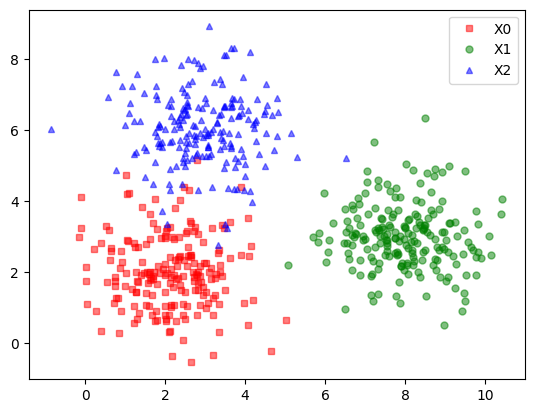

In [53]:
original_fig = plot_clusters(X, original_label)          

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.

In [54]:
K = 3

In [55]:
def initialize_centroids(X, K):
    idx = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[idx]
    return centroids

initialize_centroids(X, K)

array([[3.47425036, 5.5535282 ],
       [2.14375655, 1.85973786],
       [0.03179187, 2.14814628]])

In [56]:
def assign_clusters(X, centroids):
    distances = np.zeros((X.shape[0], K))
    for i in range(K):
        distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
    labels = np.argmin(distances, axis=1)
    return labels

assign_clusters(X, initialize_centroids(X, K))[:300]

array([0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1,
       0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2])

In [57]:
def update_centroids(X, labels, K):
    new_centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        points_in_cluster = X[labels == i]
        new_centroids[i] = np.mean(points_in_cluster, axis=0)
    return new_centroids

update_centroids(X, assign_clusters(X, initialize_centroids(X, K)), K)

array([[2.70854249, 5.27128977],
       [2.23793688, 1.42963667],
       [8.02427622, 3.00246058]])

In [58]:
def has_converged(centroids, new_centroids):
    return np.linalg.norm(centroids - new_centroids, axis=1) < 1e-4

has_converged(initialize_centroids(X, K), update_centroids(X, assign_clusters(X, initialize_centroids(X, K)), K))

array([False, False, False])

In [59]:
def EM_kmeans(X, K):
    centroids = initialize_centroids(X, K)
    all_labels = []
    for i in range(1, 100):
        # E-step
        labels = assign_clusters(X, centroids)
        all_labels.append(labels)
        # M-step
        new_centroids = update_centroids(X, labels, K)
        
        # stop if centroids do not change
        if has_converged(centroids, new_centroids).all():
            break
        centroids = new_centroids
            
    return centroids, all_labels, i

In [60]:
centroids, all_labels, i = EM_kmeans(X, K)
print(f"Centroids after {i} iterations: \n", centroids)

Centroids after 3 iterations: 
 [[2.89996528 6.08758192]
 [2.14755114 1.97971512]
 [7.98069248 3.00816797]]


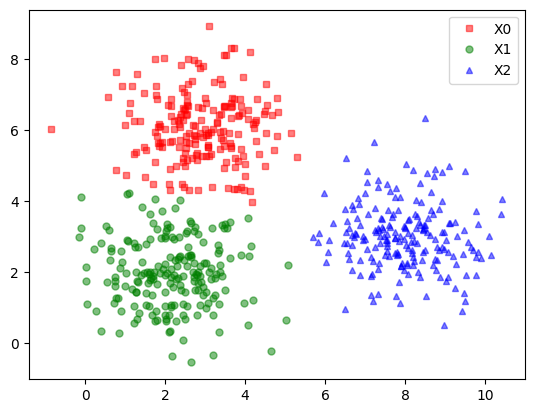

In [61]:
last_fig = plot_clusters(X, all_labels[-1])

In [62]:
def save_plots_pdf(X, all_labels, filename):
    with PdfPages(f'{filename}.pdf') as pdf:
        for i, labels in enumerate(all_labels):
            pic = plot_clusters(X, labels)
            pic.suptitle(f'Iteration {i+1}')
            pdf.savefig(pic)
            plt.close(pic)
    print(f"Saved plots to {filename}.pdf")

save_plots_pdf(X, all_labels, 'assignment1')

Saved plots to assignment1.pdf


### Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

Khởi tạo tâm cụm ngẫu nhiên ảnh hưởng thế nào tới K-means:

**Trả lời:**

Do K-means là thuật toán tối ưu bằng cách giảm thiểu khoảng cách của các điểm đến tâm cụm qua nhiều lần lặp lại. Vì vậy nếu chọn ngẫu nhiên:

- **Kết quả:** không ổn định, mỗi lần sẽ cho kết quả khác nhau, có thể đúng hoặc sai.
- **Chưa tối ưu:** có nguy cơ dừng ở cực tiểu cục bộ thay vì cực tiểu toàn cục.
- **Tốc độ:** nếu trong lần ngẫu nhiên mà phân cụm kém sẽ mất thời gian - mất nhiều vòng lặp hơn để hội tụ, ngược lại nếu khởi tạo tốt thì hội tụ nhanh và kết quả chính xác hơn.

**Cách khắc phục:** chạy K-means nhiều lần với các khởi tạo ngẫu nhiên khác nhau để chọn kết quả tốt nhất.
